In [1]:
import torch
import torchvision

/home/lukmanaliyu/miniconda3/envs/arewads/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lukmanaliyu/miniconda3/envs/arewads/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
torch.__version__

'2.0.1'

# Creating tensors in pytorch

In [4]:
import torch
import numpy as np
np.set_printoptions(precision=3)
a = [1,2,3]
b = np.array([4,5,6],dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)



tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [5]:
t_ones = torch.ones(2,3)
t_ones.shape

torch.Size([2, 3])

In [6]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
rand_tensor = torch.rand(2,3)
rand_tensor

tensor([[0.4323, 0.0826, 0.0362],
        [0.4252, 0.2178, 0.7457]])

# Manipulating the data type and shape of a tensor

In [8]:
t_a_new  = t_a.to(torch.int64)
t_a_new

tensor([1, 2, 3])

In [9]:
# transposing a tensor
t = torch.rand(3,5)
t_tr = torch.transpose(t,0,1)
print(t.shape,"=>",t_tr.shape)

torch.Size([3, 5]) => torch.Size([5, 3])


In [10]:
# reshaping a tensor
t = torch.zeros(30)
t_reshape = t.reshape(5,6)
print(t.shape,"=>",t_reshape.shape)

torch.Size([30]) => torch.Size([5, 6])


In [11]:
# removing unnecessary dimensions, i.e. dimensions with shape 1 that are not needed
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t,4)
print(t.shape,"=>",t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) => torch.Size([1, 2, 1, 4])


# Applying maths operations to tensors

In [12]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) -1 
t2 = torch.normal(mean=0,std=1,size=(5,2))


In [13]:
t3 = torch.multiply(t1,t2)
t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [14]:
torch.mean(t1,axis=0)

tensor([-0.1373,  0.2028])

In [15]:
torch.mean(t1,axis=1)

tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083])

In [16]:
torch.matmul(t1,torch.transpose(t2,0,1))

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

In [17]:
torch.matmul(torch.transpose(t1,0,1),t2)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])

In [18]:
torch.linalg.norm(t1,ord=2,dim=1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])

# Split, stack and concatenate tensors

In [19]:
# providing the number of splits
torch.manual_seed(1)
t = torch.rand(6)
print(t)
t_splits = torch.chunk(t,3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [20]:
# providing the sizes of different splits
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_splits = torch.split(t,[3,2])
[t.numpy() for t in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [21]:
# concatenate or stack tensors
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A,B],axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [22]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A,B],axis=0)
print(S)

tensor([[1., 1., 1.],
        [0., 0., 0.]])


# Building input pipelines in Pytorch

## Creating a PyTorch DataLoader from existing tensors

In [23]:
from torch.utils.data import DataLoader
t = torch.arange(6,dtype=torch.float32)
data_loader = DataLoader(t)

In [24]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [25]:
data_loader = DataLoader(t,batch_size=3,drop_last=False)
for i,batch in enumerate(data_loader,1):
    print(f'batch {i}: {batch}')

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


## Combining two tensors into a joint dataset

In [26]:
torch.manual_seed(1)
t_x = torch.rand([4,3],dtype=torch.float32)
t_y = torch.arange(4)

In [27]:
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self,x,y): # this and the getitem method must be in the custom dataset class for use by dataloader
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx],self.y[idx]
        

In [28]:
joint_dataset = JointDataset(t_x,t_y)
for example in joint_dataset:
    print('   x:', example[0], '   y: ', example[1])

   x: tensor([0.7576, 0.2793, 0.4031])    y:  tensor(0)
   x: tensor([0.7347, 0.0293, 0.7999])    y:  tensor(1)
   x: tensor([0.3971, 0.7544, 0.5695])    y:  tensor(2)
   x: tensor([0.4388, 0.6387, 0.5247])    y:  tensor(3)


## Shuffle, batch and repeat

In [29]:
# creating shuffled version of dataloader for the jointdataset
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset,batch_size=2,shuffle=1)

In [30]:
# iterate through the data loader entry by entry
for i,batch in enumerate(data_loader,1):
    print(f' batch {i} x: {batch[0]} \n y: {batch[1]}')

 batch 1 x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
 y: tensor([2, 0])
 batch 2 x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])


In [31]:
# iterating over the batched dataset twice

for epoch in range(2):
    print(f'epoch {epoch + 1}')
    for i,batch in enumerate(data_loader,1):
        print(f'batch {i} x: {batch[0]} \n y: {batch[1]}')

epoch 1
batch 1 x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([0, 2])
batch 2 x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])
epoch 2
batch 1 x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([3, 2])
batch 2 x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
 y: tensor([0, 1])


## Creating a dataset from files on your local storage disk

In [33]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape (900, 1200, 3)
Image shape (900, 1200, 3)
Image shape (900, 742, 3)
Image shape (800, 1200, 3)
Image shape (800, 1200, 3)
Image shape (900, 1200, 3)


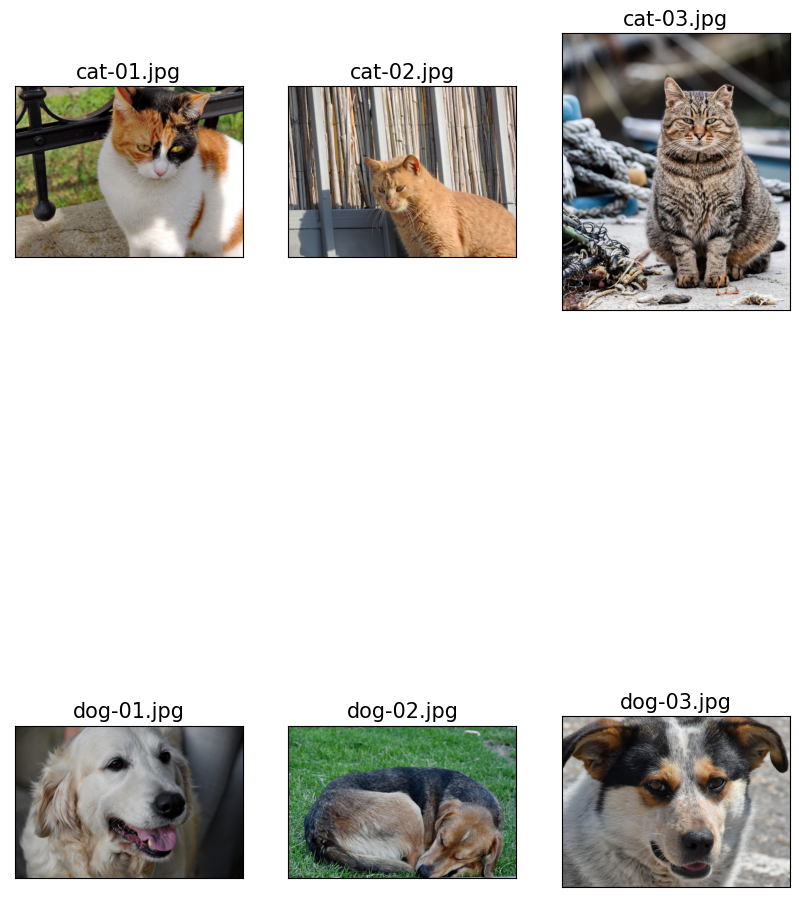

In [34]:
# visualize using matplotlib
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10,15))
for i,file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape', np.array(img).shape)
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file),size = 15)
plt.tight_layout
plt.show()

In [35]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [36]:
class ImageDataset(Dataset):
    def __init__(self,file_list,labels):
        self.file_list = file_list
        self.labels = labels
        
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file,label
    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list,labels)
for file,label in image_dataset:
    print(file,label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


In [37]:
import torchvision.transforms as transforms
img_height, img_width = 80,120
transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((img_height,img_width),antialias=True),])

In [38]:
# update ImageDataset class with the transform
class ImageDataset(Dataset):
    def __init__(self,file_list,labels,transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self,index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img,label
    
    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list,labels,transform)
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


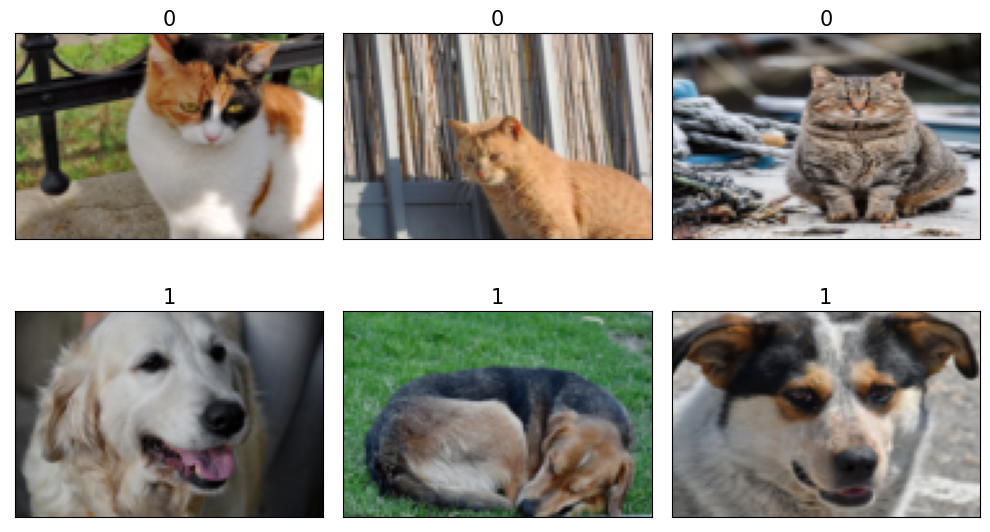

In [39]:
fig = plt.figure(figsize=(10,6))
for i,example in enumerate(image_dataset,1):
    ax = fig.add_subplot(2,3,i)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1,2,0)))
    ax.set_title(f'{example[1]}',size=15)

plt.tight_layout()
plt.show()
    

### Fetching available datasets from the torchvision.datasets library

In [40]:
image_path = './'
mnist_dataset = torchvision.datasets.MNIST(image_path,'train',download=True)

100%|██████████| 9912422/9912422 [00:03<00:00, 2757959.59it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 5198956.82it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1216829.21it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10805745.19it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [41]:
assert isinstance(mnist_dataset,torch.utils.data.Dataset)

In [43]:
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x79D754553370>, 5)


In [44]:
from itertools import islice

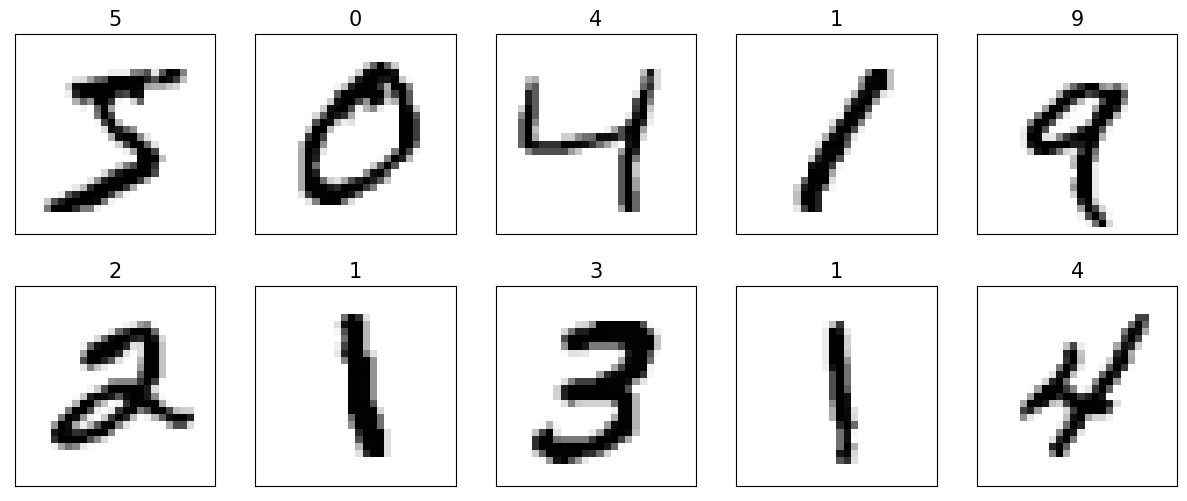

In [45]:
fig = plt.figure(figsize=(15,6))
for i,(image,label) in islice(enumerate(mnist_dataset),10):
    ax = fig.add_subplot(2,5,i + 1)
    ax.set_xticks([]) ; ax.set_yticks([])
    ax.imshow(image,cmap='gray_r')
    ax.set_title(f'{label}',size = 15)
plt.show()

# Building an NN model in PyTorch

## The PyTorch neural network module (torch.nn)

### Building a linear regression model

First from scratch, then using the torch.nn

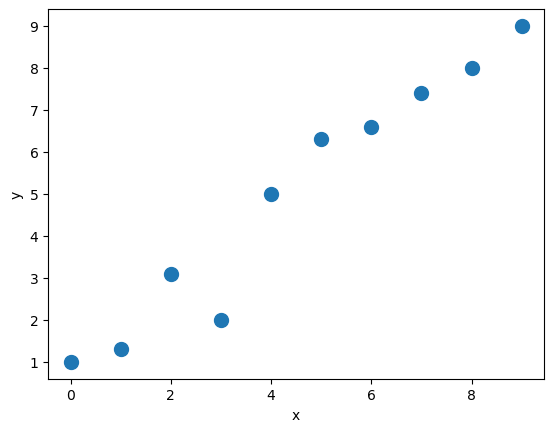

In [46]:
X_train = np.arange(10,dtype='float32').reshape(10,1)
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype='float32')
plt.plot(X_train,y_train,'o',markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [47]:
from torch.utils.data import TensorDataset
X_train = np.arange(10,dtype='float32').reshape(10,1)
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype='float32')
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds  = TensorDataset(X_train_norm,y_train)
batch_size = 1
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [48]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_
bias = torch.zeros(1,requires_grad=True)

# defining the model
def model(xb):
    return xb @ weight + bias

# then define the cost function to optimise the model
def loss_fn(input,target):
    return (input- target).pow(2).mean()



In [49]:

from torch.utils.data import TensorDataset
X_train = np.arange(10,dtype='float32').reshape(10,1)
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype='float32')
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds  = TensorDataset(X_train_norm,y_train)
batch_size = 1
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

torch.manual_seed(1)
weight = torch.randn(1,requires_grad=True)
bias = torch.zeros(1,requires_grad=True)

# defining the model
def model(xb):
    return xb @ weight + bias

# then define the cost function to optimise the model
def loss_fn(input,target):
    return (input- target).pow(2).mean()


# train model for 200 epochs
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred,y_batch)
        loss.backward()
    with torch.no_grad():
        weight = weight - weight.grad * learning_rate
        bias  = bias - bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch: {epoch} Loss: {loss.item():.4f} ')
        

AttributeError: 'NoneType' object has no attribute 'zero_'

In [50]:
import torch

torch.manual_seed(1)

# Initialize weight as a 1D tensor (vector)
weight = torch.randn(1, requires_grad=True)

bias = torch.zeros(1, requires_grad=True)
 
def loss_fn(input, target):
    return (input - target).pow(2).mean()

def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
 
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

print('Final Parameters:', weight.item(), bias.item())


Epoch 0  Loss 45.0782
Epoch 10  Loss 26.4366
Epoch 20  Loss 1.5918
Epoch 30  Loss 14.1307
Epoch 40  Loss 11.6038
Epoch 50  Loss 6.3084
Epoch 60  Loss 0.6349
Epoch 70  Loss 3.1374
Epoch 80  Loss 1.9999
Epoch 90  Loss 0.3133
Epoch 100  Loss 0.7653
Epoch 110  Loss 1.0039
Epoch 120  Loss 0.0235
Epoch 130  Loss 0.5176
Epoch 140  Loss 0.0759
Epoch 150  Loss 1.8789
Epoch 160  Loss 0.0008
Epoch 170  Loss 0.0866
Epoch 180  Loss 0.0646
Epoch 190  Loss 0.0011
Final Parameters: 2.6696107387542725 4.879678249359131


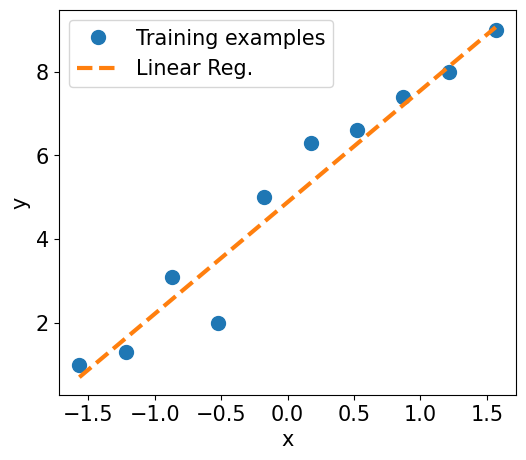

In [51]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 

plt.show()

### Model training via the torch.nn and torch.optim modules

In [52]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size,output_size)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0] 

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')




print('Final Parameters:', model.weight.item(), model.bias.item())
 

Epoch 0  Loss 24.6684
Epoch 10  Loss 29.1377
Epoch 20  Loss 20.9207
Epoch 30  Loss 0.1257
Epoch 40  Loss 12.4922
Epoch 50  Loss 1.7845
Epoch 60  Loss 7.6425
Epoch 70  Loss 2.5606
Epoch 80  Loss 0.0157
Epoch 90  Loss 0.7548
Epoch 100  Loss 0.8412
Epoch 110  Loss 0.4923
Epoch 120  Loss 0.0823
Epoch 130  Loss 0.0794
Epoch 140  Loss 0.0891
Epoch 150  Loss 0.0973
Epoch 160  Loss 0.1043
Epoch 170  Loss 0.1103
Epoch 180  Loss 0.0009
Epoch 190  Loss 0.0764
Final Parameters: 2.6496422290802 4.87706995010376


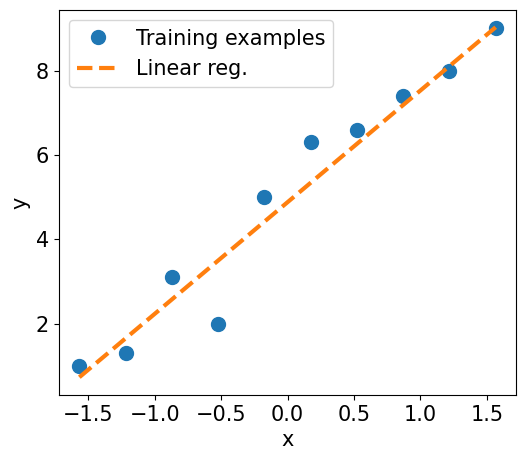

In [53]:
# visualize to ensure similarity with the regular one

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 

plt.show()


## Building a multilayer perceptron for classifying flowers in the Iris dataset

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris['data']
y = iris['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1./3,random_state=1)

In [55]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [56]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [57]:
# model training

num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)


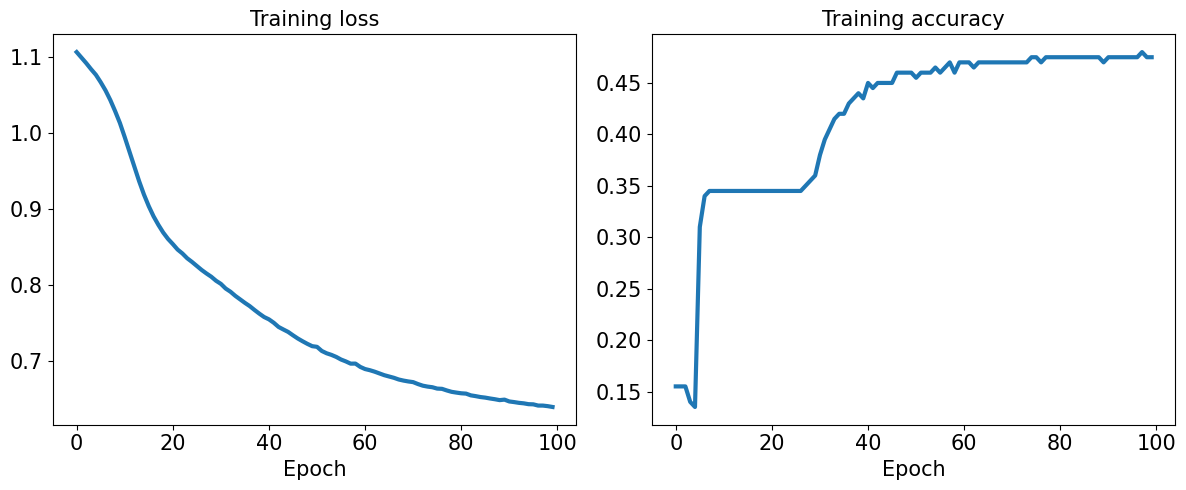

In [58]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')
 
plt.show()

## Evaluating the trained model on the test dataset


In [59]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')



Test Acc.: 0.9800


In [60]:
## saving and reloading the trained model
path = 'iris_classifier.pt'
torch.save(model, path)



In [61]:
model_new = torch.load(path)

In [62]:
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [63]:
# evaluating the saved model to confirm they are the same
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [64]:
# saving only learned parameters

path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)


In [66]:
'''Reloading saved parameters requires constructing the model architecture and 
then passing the parameters:'''
model_new2 = Model(input_size, hidden_size, output_size)
model_new2.load_state_dict(torch.load(path))


<All keys matched successfully>

In [67]:
# evaluating the saved parameters:

pred_test = model_new2(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


Same, proved